In [232]:
# ensemle model KN, naive(gaussiannb) , decisiontree on voting classifier
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [233]:
indexes = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','earned']

In [234]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names=indexes)
dff = df

In [235]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earned
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [236]:
df['workclass'] = df['workclass'].replace(' ?',df['workclass'].max())
df['occupation']= df['occupation'].replace(' ?',df['occupation'].max())

In [237]:
earned = df['earned']
earned.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: earned, dtype: object

In [238]:
df = df.drop('earned',axis=1)

In [239]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [240]:
mylist = list(df.select_dtypes(include=['object']).columns)
df = pd.get_dummies(df, prefix= mylist)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [241]:
earned = pd.get_dummies(earned)

In [242]:
earned_less_50 = earned[' <=50K']

In [243]:
train_x,test_x, train_y,test_y = train_test_split(df,earned_less_50)

In [244]:
estimators = []

In [245]:
clf1 = GaussianNB()

In [246]:
estimators.append(('gaussiannb', clf1))

In [247]:
clf2 = DecisionTreeClassifier()

In [248]:
estimators.append(('decisiontree', clf2))

In [249]:
clf3 = KNeighborsClassifier()

In [250]:
estimators.append(('kneighbors',clf3))

In [251]:
clf  = VotingClassifier(estimators)

In [252]:
clf.fit(train_x,train_y)

VotingClassifier(estimators=[('gaussiannb', GaussianNB(priors=None)), ('decisiontree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_sa...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [ ]:
score = clf.score(test_x,test_y)

In [ ]:
predicted = clf.predict(test_x)
mse = np.mean((predicted-test_y)**2)

In [255]:
print('Score: ',score, 'MSE: ',mse)

('Score: ', 0.8118167301314335, 'MSE: ', 0.1881832698685665)


In [256]:
for i,j in zip(predicted,test_y):
    if i:
        print('>50K Predicted: %d Real: %d'%(i,j))
    else:
        print('<=50K Predicted: %d Real: %d'%(i,j))

>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 0
<=50K Predicted: 0 Real: 0
<=50K Predicted: 0 Real: 1
<=50K Predicted: 0 Real: 0
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 0
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 1
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 1
>5

>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Pre

>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 0
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 1
>50K Predicted: 1 Real: 0
>50K Predicted: 1 Real: 0
<=50K Predicted: 0 Real: 0
>50K Predicted: 1 Real: 1
<=50K Predicted: 0 Real: 0
<=50K P

In [257]:
yy = pd.DataFrame(test_x['age'])

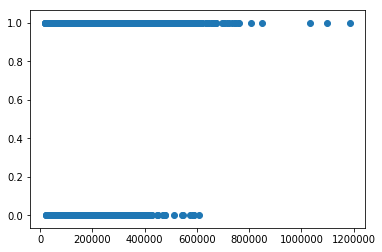

(<matplotlib.collections.PathCollection at 0x7f3fc36319d0>, None)

In [258]:
plt.scatter(test_x['fnlwgt'],predicted), plt.show()